In [11]:
def average_x_Q2(region_str):
    # Parse region string
    conditions = region_str.split('&')
    q2_lower_str, q2_upper_str, x_lower_str, x_upper_str = conditions
    x_lower = float(x_lower_str.split('>')[-1].strip().replace(')', ''))
    x_upper = float(x_upper_str.split('<')[-1].strip().replace(')', ''))
    
    # Correctly replace [x] with 'x'
    q2_lower_str = q2_lower_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*')
    q2_upper_str = q2_upper_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*')

    # Create lambda functions
    q2_lower_func = eval('lambda x: ' + q2_lower_str.split('>')[-1].strip())
    q2_upper_func = eval('lambda x: ' + q2_upper_str.split('<')[-1].strip())
    
    # Monte Carlo sampling
    N_samples = 1000000  # The number of samples
    x_samples = np.random.uniform(x_lower, x_upper, N_samples)
    Q2_samples = np.random.uniform(np.min([q2_lower_func(i) for i in x_samples]), 
                                   np.max([q2_upper_func(i) for i in x_samples]), N_samples)
    valid_samples = np.logical_and(q2_lower_func(x_samples) <= Q2_samples, Q2_samples <= q2_upper_func(x_samples))

    # Calculate averages
    x_avg = np.mean(x_samples[valid_samples])
    Q2_avg = np.mean(Q2_samples[valid_samples])

    return x_avg, Q2_avg

In [12]:
expression = "([Q2]>1.4144 + -5.4708 * [x] + 40.5357 * [x]*[x] + -40.0208 * [x]*[x]*[x] + 29.2121 * [x]*[x]*[x]*[x])&([Q2]<0.6361935324019532 + 5.961630973508846*[x] + 12.028695097029118*[x]*[x])&([x]>0.12)&([x]<0.2)"
avg_x, avg_Q2 = calculate_average_values(expression)
print("Average x:", avg_x)
print("Average Q2:", avg_Q2)


ZeroDivisionError: division by zero

In [17]:
def average_x_Q2(region_str):
    # Parse region string
    conditions = region_str.split('&')
    q2_lower_str, q2_upper_str, x_lower_str, x_upper_str = conditions
    x_lower = float(x_lower_str.split('>')[-1].strip().replace(')', ''))
    x_upper = float(x_upper_str.split('<')[-1].strip().replace(')', ''))
    
    # Correctly replace [x] with 'x'
    q2_lower_str = q2_lower_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*').replace("xx","x*x").replace(")","")
    q2_upper_str = q2_upper_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*').replace("xx","x*x").replace(")","")

    # Create lambda functions
    q2_lower_func = eval('lambda x: ' + q2_lower_str.split('>')[-1].strip())
    q2_upper_func = eval('lambda x: ' + q2_upper_str.split('<')[-1].strip())
    
    # Monte Carlo sampling
    N_samples = 1000000  # The number of samples
    x_samples = np.random.uniform(x_lower, x_upper, N_samples)
    Q2_samples = np.random.uniform(np.min([q2_lower_func(i) for i in x_samples]), 
                                   np.max([q2_upper_func(i) for i in x_samples]), N_samples)
    valid_samples = np.logical_and(q2_lower_func(x_samples) <= Q2_samples, Q2_samples <= q2_upper_func(x_samples))

    # Calculate averages
    x_avg = np.mean(x_samples[valid_samples])
    Q2_avg = np.mean(Q2_samples[valid_samples])

    return x_avg, Q2_avg

In [18]:
region_str = "([Q2]>1.4144 + -5.4708 * [x] + 40.5357 * [x]*[x] + -40.0208 * [x]*[x]*[x] + 29.2121 * [x]*[x]*[x]*[x])&([Q2]<0.6361935324019532 + 5.961630973508846*[x] + 12.028695097029118*[x]*[x])&([x]>0.12)&([x]<0.2)"
x_avg, Q2_avg = average_x_Q2(region_str)
print(f"Average x: {x_avg}, Average Q2: {Q2_avg}")


Average x: 0.16572917485917066, Average Q2: 1.7168900129775508


In [19]:
region_str = "([Q2]>1)&([Q2]<2)&([x]>0.1)&([x]<0.2)"
x_avg, Q2_avg = average_x_Q2(region_str)
print(f"Average x: {x_avg}, Average Q2: {Q2_avg}")


Average x: 0.15001916947766586, Average Q2: 1.5001302365399618


In [20]:
from scipy import integrate

def area_x_Q2(region_str):
    # Parse region string
    conditions = region_str.split('&')
    q2_lower_str, q2_upper_str, x_lower_str, x_upper_str = conditions
    x_lower = float(x_lower_str.split('>')[-1].strip().replace(')', ''))
    x_upper = float(x_upper_str.split('<')[-1].strip().replace(')', ''))
    
    # Correctly replace [x] with 'x'
    q2_lower_str = q2_lower_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*').replace("xx","x*x").replace(")","")
    q2_upper_str = q2_upper_str.replace('[x]', 'x').replace('*x*', '*x').replace('**', '*').replace("xx","x*x").replace(")","")

    # Create lambda functions
    q2_lower_func = eval('lambda x: ' + q2_lower_str.split('>')[-1].strip())
    q2_upper_func = eval('lambda x: ' + q2_upper_str.split('<')[-1].strip())
    
    # Calculate area
    area, _ = integrate.quad(lambda x: q2_upper_func(x) - q2_lower_func(x), x_lower, x_upper)
    return area

In [22]:
region_str = "([Q2]>1.4144 + -5.4708 * [x] + 40.5357 * [x]*[x] + -40.0208 * [x]*[x]*[x] + 29.2121 * [x]*[x]*[x]*[x])&([Q2]<0.6361935324019532 + 5.961630973508846*[x] + 12.028695097029118*[x]*[x])&([x]>0.12)&([x]<0.2)"
area = area_x_Q2(region_str)
print(f"Area: {area}")


Area: 0.03668939956926903


In [47]:
import numpy as np
from scipy.optimize import minimize

def parse_conditions(conditions):
    parsed_conditions = {}
    for condition in conditions:
        var = condition.split('[')[-1].split(']')[0]
        if var not in parsed_conditions:
            parsed_conditions[var] = {"lower": None, "upper": None}

        if '>' in condition:
            parsed_conditions[var]["lower"] = condition
        elif '<' in condition:
            parsed_conditions[var]["upper"] = condition
    return parsed_conditions

def average_x_Q2(region_str_list):
    conditions = [i.strip() for region_str in region_str_list for i in region_str.split('&')]
    
    parsed_conditions = parse_conditions(conditions)
    
    for var, condition in parsed_conditions.items():
        for bound in ['lower', 'upper']:
            condition_str = condition[bound]
            if condition_str is not None:
                condition_str = condition_str.replace(f'[{var}]', 'x').replace('*x*', '*x').replace('**', '*').replace("xx","x*x")
                condition[bound] = eval('lambda x: ' + condition_str.split(f'>{bound=="lower"}')[-1].strip())

    variables = list(parsed_conditions.keys())
    
    # Monte Carlo sampling
    N_samples = 1000000  # The number of samples
    
    result = {}
    for var in variables:
        x_lower = parsed_conditions[var]['lower'](0) if callable(parsed_conditions[var]['lower']) else parsed_conditions[var]['lower']
        x_upper = parsed_conditions[var]['upper'](0) if callable(parsed_conditions[var]['upper']) else parsed_conditions[var]['upper']
        
        x_samples = np.random.uniform(x_lower, x_upper, N_samples)
        result[var] = np.mean(x_samples)
    return result

In [48]:
region_str_list = [
    "([z]>0.5)&([z]<0.6)",
    "([pTtot]>0.2)&([pTtot]<0.4)",
    "([Q2]>1.4144 + -5.4708 * [x] + 40.5357 * [x]*[x] + -40.0208 * [x]*[x]*[x] + 29.2121 * [x]*[x]*[x]*[x])&([Q2]<0.6361935324019532 + 5.961630973508846*[x] + 12.028695097029118*[x]*[x])&([x]>0.12)&([x]<0.2)"
]

result = average_x_Q2(region_str_list)
for var, avg in result.items():
    print(f"Average {var}: {avg}")

Average z: 0.5004524542952219
Average pTtot: 0.5002807932634944
Average x: 0.49986114019209255


In [38]:
import ROOT
f=ROOT.TFile("../projects/test/volatile/data/piplus_piminus/MC_RGA_3051_0.root")

In [39]:
t=f.Get("dihadron_cuts")
region_str = "&".join(region_str_list)
region_str = region_str.replace("&","&&").replace("[","rec_").replace("]","")

In [40]:
t.Draw("rec_z",region_str)

1646

In [46]:
def calculate_average(tree_name, branch_name, cut_expression, file_name):
    c=ROOT.TCanvas()
    file = ROOT.TFile(file_name)
    tree = file.Get(tree_name)
  
    tree.Draw(branch_name + ">>hist_name", cut_expression)
  
    hist = ROOT.gPad.GetPrimitive("hist_name")
    average = hist.GetMean()
  
    file.Close()
  
    return average

tree_name = "dihadron_cuts"
branch_name = "rec_x"
cut_expression = region_str
file_name = "../projects/test/volatile/data/piplus_piminus/MC_RGA_3051_1.root"

average = calculate_average(tree_name, branch_name, cut_expression, file_name)
print("Average value:", average)

Average value: 0.16648292426598763


In [14]:
import ROOT
import numpy as np
from scipy.stats import wasserstein_distance

# Generate random data for histograms
np.random.seed(42)
data_1 = np.random.normal(loc=0, scale=1, size=10000)
data_2 = np.random.normal(loc=0, scale=1, size=10000)

# Create ROOT histograms
hist_1 = ROOT.TH1F("hist_1", "Histogram 1", 20, -5, 5)
hist_2 = ROOT.TH1F("hist_2", "Histogram 2", 20, -5, 5)

# Fill histograms with data
for value in data_1:
    hist_1.Fill(value)

for value in data_2:
    hist_2.Fill(value)

# Convert ROOT histograms to numpy arrays
hist_data_1 = []
hist_data_2 = []
for i in range(1, hist_1.GetNbinsX() + 1):
    hist_data_1.append(hist_1.GetBinContent(i))
    hist_data_2.append(hist_2.GetBinContent(i))

# Calculate the Earth Mover's Distance (EMD)
emd = wasserstein_distance(hist_data_1, hist_data_2)

# Print the result
print("Earth Mover's Distance: ", emd)


Earth Mover's Distance:  16.0


Warning in <TROOT::Append>: Replacing existing TH1: hist_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_2 (Potential memory leak).


In [8]:
import ROOT
from scipy.stats import wasserstein_distance

# Load ROOT histogram data
root_file = ROOT.TFile.Open('path/to/your/root/file.root')
root_hist_name_1 = 'histogram_name_1'
root_hist_name_2 = 'histogram_name_2'

hist_1 = root_file.Get(root_hist_name_1)
hist_2 = root_file.Get(root_hist_name_2)

# Convert ROOT histograms to numpy arrays
hist_data_1 = []
hist_data_2 = []
for i in range(1, hist_1.GetNbinsX() + 1):
    hist_data_1.append(hist_1.GetBinContent(i))
    hist_data_2.append(hist_2.GetBinContent(i))

# Calculate the Earth Mover's Distance (EMD)
emd = wasserstein_distance(hist_data_1, hist_data_2)

# Print the result
print("Earth Mover's Distance: ", emd)

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file path/to/your/root/file.root does not exist


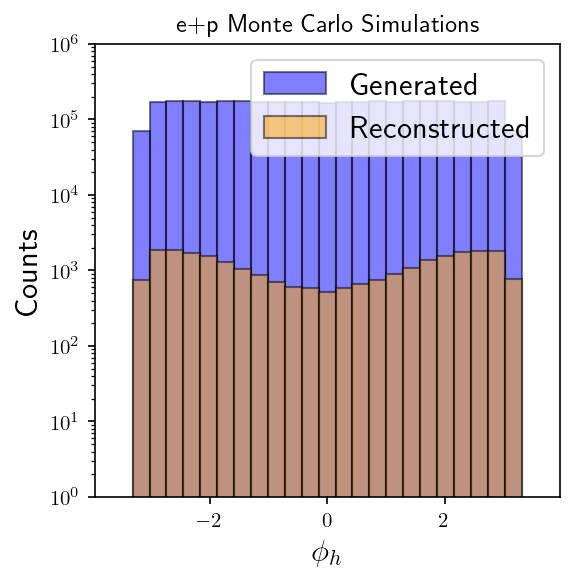

In [65]:
import uproot
import matplotlib.pyplot as plt
# Set the backend to generate LaTeX output
plt.rcParams["text.usetex"] = True
# Open the ROOT file and get the TTree
file = uproot.open("../projects/test/volatile/data/piplus_piminus/MC_RGA_3051_0.root")
tree = file["dihadron_cuts"]

# Read the data from the TTree using uproot
gen_phi_h = tree["gen_phi_h"].array()
rec_phi_h = tree["rec_phi_h"].array()
rec_passDihadron = tree["rec_passDihadron"].array()

# Plot histograms with plt.hist()
plt.figure(dpi=150,figsize=(4,4))
plt.hist(gen_phi_h, bins=25, range=(-3.6, 3.6), histtype='bar', color='blue', ec="black",alpha=0.5, label='Generated')
plt.hist(rec_phi_h[rec_passDihadron==1], bins=25, range=(-3.6, 3.6), histtype='bar', ec="black", color='orange',alpha=0.5, label='Reconstructed')


# Set plot properties
plt.xlabel("$\phi_{h}$",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yscale("log")
plt.title("e+p Monte Carlo Simulations")
plt.ylim(1, 1000000)
plt.legend(fontsize=15)

# Show the plot
plt.show()


In [35]:
rec_phi_h[rec_passDihadron==1]

<Array [0.0805, 1.56, -2.56, ..., -2.98, 2.06, 3.03] type='26385 * float64'>